# Deepelec V1 calculation/investigation

In [1]:
import datatoolbox as dt

In [2]:
import numpy as np  # Used for creating rating / indicator functions
import pyam  # Useful for storing climate / energy scenario data
import pandas as pd

from pandas_indexing import *

import data_shepherd as ds
from data_shepherd.utils import convert_unit
import datatoolbox as dt

import pycountry

from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns


ca_colors = ['#95AD28','#2C8090','#F0280E','#F0CF1C','#1478B0','#59C954','#059E73','#945EB0','#383836','#828282','#C2C2C2']
ca_colors = sns.color_palette(ca_colors)
ca_colors

from matplotlib import rcParams
# rcParams['font.sans-serif'] = ['Lato']

sns.set_palette(ca_colors)

<IPython.core.display.Javascript object>

## Import V1 data

In [3]:
df = pyam.IamDataFrame('../phaseI_1/REMIND_phaseI_1_2024-04-15_19.21.17.xlsx')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ../phaseI_1/REMIND_phaseI_1_2024-04-15_19.21.17.xlsx


In [4]:
ikea_phase2 = dt.findp(source='IKEA_phase2_downscaling').as_pyam()

In [5]:
ipcc_ar6 = dt.findp(
    source = 'IPCC_AR6_raw', 
    scenario = [
        'CEMICS_SSP1-1p5C-minCDR', 
        # 'SusDev_SSP1-PkBudg900',
        'DeepElec_SSP2_ HighRE_Budg900', 
        'NGFS2_Net-Zero 2050 - IPD-95th'
    ]).as_pyam()

## Small investigations

### Emissions

In [6]:
df.filter(region = 'World', variable = 'Emissions|CO2', year = [2020,2025]).timeseries()

2020  \
model      scenario                            region variable      unit                      
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Emissions|CO2 Mt CO2/yr  44077.788273   
           SSP2EU-PkBudg500_cost_year_bionu    World  Emissions|CO2 Mt CO2/yr  44077.788273   

                                                                                       2025  
model      scenario                            region variable      unit                     
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Emissions|CO2 Mt CO2/yr  34024.283704  
           SSP2EU-PkBudg500_cost_year_bionu    World  Emissions|CO2 Mt CO2/yr  34777.512832

In [7]:
df.filter(region = 'World', variable = 'Emissions|Kyoto Gases', year = [2020,2030]).timeseries()

2020  \
model      scenario                            region variable              unit                           
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Emissions|Kyoto Gases Mt CO2-equiv/yr  58305.29229   
           SSP2EU-PkBudg500_cost_year_bionu    World  Emissions|Kyoto Gases Mt CO2-equiv/yr  58305.29229   

                                                                                                     2030  
model      scenario                            region variable              unit                           
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Emissions|Kyoto Gases Mt CO2-equiv/yr  33427.713421  
           SSP2EU-PkBudg500_cost_year_bionu    World  Emissions|Kyoto Gases Mt CO2-equiv/yr  30842.204616

/Users/marie-charlottegeffray/opt/anaconda3/envs/cpt_generic/lib/python3.8/site-packages/pyam/plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
/Users/marie-charlottegeffray/opt/anaconda3/envs/cpt_generic/lib/python3.8/site-packages/pyam/plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


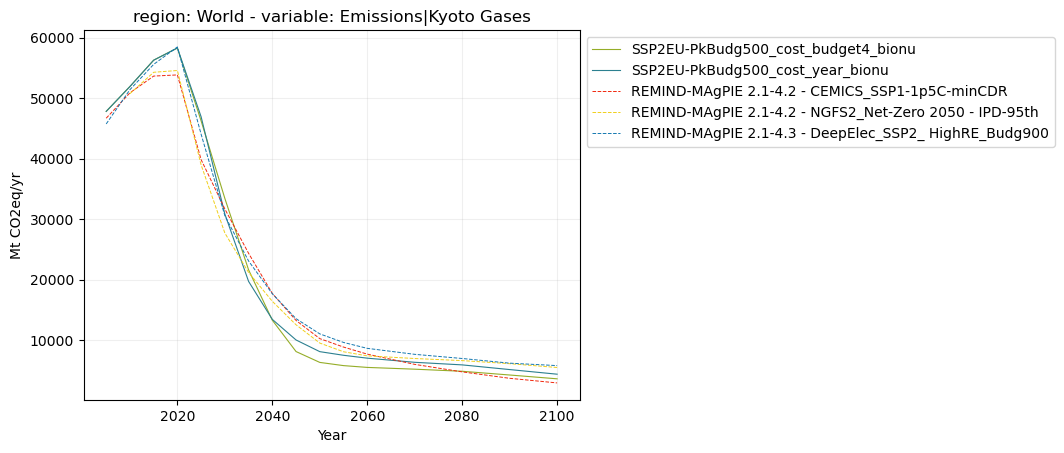

In [8]:
df.filter(variable = 'Emissions|Kyoto Gases', region = 'World').plot(linewidth = 0.8)
ipcc_ar6.filter(region='World', variable = 'Emissions|Kyoto Gases').plot(ax=plt.gca(), linestyle = '--', linewidth = 0.7)
plt.legend(bbox_to_anchor=(1,1))
plt.grid(alpha=0.2)

### Primary energy

In [9]:
df.filter(region = 'World', variable = 'Primary Energy|Coal', year = [2020,2030,2050]).timeseries()

2020  \
model      scenario                            region variable            unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Coal EJ/yr  172.371001   
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Coal EJ/yr  172.371001   

                                                                                      2030  \
model      scenario                            region variable            unit               
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Coal EJ/yr  87.289276   
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Coal EJ/yr  39.370794   

                                                                                     2050  
model      scenario                            region variable            unit             
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Coal EJ/yr  3.312294  
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Coal EJ/yr  3.191576

In [10]:
# 2020-2030 change
print("for budget scenario :", ((172.371001	- 87.289276)/172.371001)*100)
print("for original scenario :", ((172.371001	- 39.370794)/172.371001)*100)

for budget scenario : 49.35965127916151
for original scenario : 77.15927054342512


In [11]:
# 2020-2030 change
print("for budget scenario :", ((172.371001	- 3.312294)/172.371001)*100)
print("for original scenario :", ((172.371001	- 3.191576)/172.371001)*100)

for budget scenario : 98.07839254817577
for original scenario : 98.1484263701642


/Users/marie-charlottegeffray/opt/anaconda3/envs/cpt_generic/lib/python3.8/site-packages/pyam/plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


<Axes: title={'center': 'model: REMIND-MAgPIE 2.1-4.3 - scenario: DeepElec_SSP2_ HighRE_Budg900 - region: World - variable: Primary Energy|Oil'}, xlabel='Year', ylabel='EJ/yr'>

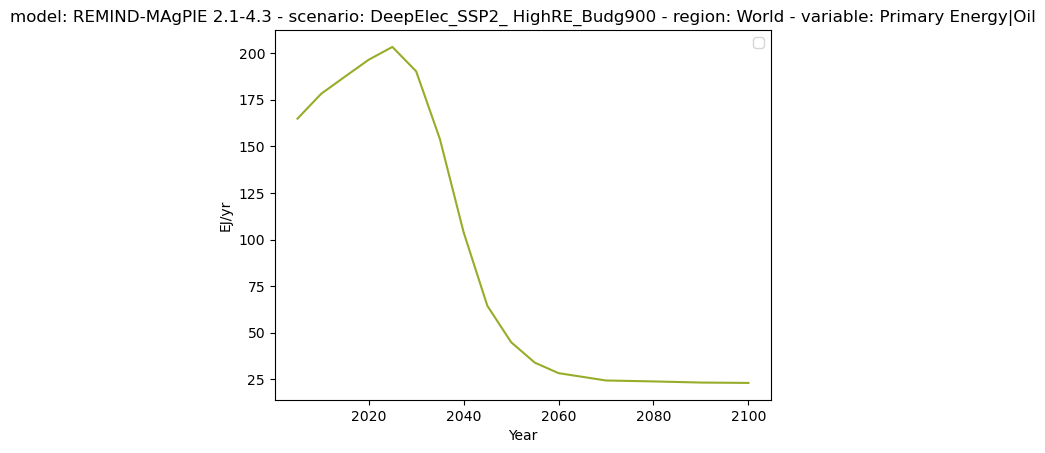

In [12]:
ipcc_ar6.filter(region = 'World', variable = 'Primary Energy|Oil', scenario = 'Deep*').plot()

In [13]:
df.filter(region = 'World', variable = 'Primary Energy|Oil', year = [2020,2030,2050]).timeseries()

2020  \
model      scenario                            region variable           unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Oil EJ/yr  190.630347   
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Oil EJ/yr  190.630347   

                                                                                      2030  \
model      scenario                            region variable           unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Oil EJ/yr  119.314119   
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Oil EJ/yr  138.899832   

                                                                                     2050  
model      scenario                            region variable           unit              
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Oil EJ/yr  27.441491  
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Oil EJ/yr  42.774144

In [14]:
# 2020-2030 change
print("for budget scenario :", ((190.630347	- 119.314119)/190.630347)*100)
print("for original scenario :", ((190.630347	- 138.899832)/190.630347)*100)

for budget scenario : 37.41074237251428
for original scenario : 27.13655816825429


In [15]:
# 2020-2030 change
print("for budget scenario :", ((190.630347	- 27.441491)/190.630347)*100)
print("for original scenario :", ((190.630347	- 42.774144)/190.630347)*100)

for budget scenario : 85.60486751881115
for original scenario : 77.56173417656319


In [16]:
df.filter(region = 'World', variable = 'Primary Energy|Gas', year = [2020,2030,2050]).timeseries()

2020  \
model      scenario                            region variable           unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Gas EJ/yr  134.581876   
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Gas EJ/yr  134.581876   

                                                                                     2030  \
model      scenario                            region variable           unit               
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Gas EJ/yr  78.629520   
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Gas EJ/yr  83.762732   

                                                                                     2050  
model      scenario                            region variable           unit              
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Gas EJ/yr   7.333355  
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Gas EJ/yr  11.637534

In [17]:
# 2020-2030 change
print("for budget scenario :", ((134.581876	- 78.629520)/134.581876)*100)
print("for original scenario :", ((134.581876	- 83.762732)/134.581876)*100)

for budget scenario : 41.57495619989723
for original scenario : 37.760763566707894


In [18]:
# 2020-2030 change
print("for budget scenario :", ((134.581876	- 7.333355)/134.581876)*100)
print("for original scenario :", ((134.581876	- 11.637534)/134.581876)*100)

for budget scenario : 94.55100848794827
for original scenario : 91.35282227749597


In [19]:
df.filter(region = 'World', variable = 'Primary Energy|Biomass', year = [2020,2030,2050]).timeseries()

2020  \
model      scenario                            region variable               unit               
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Biomass EJ/yr  55.268406   
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Biomass EJ/yr  55.268406   

                                                                                         2030  \
model      scenario                            region variable               unit               
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Biomass EJ/yr  77.157898   
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Biomass EJ/yr  73.565206   

                                                                                         2050  
model      scenario                            region variable               unit              
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Primary Energy|Biomass EJ/yr  64.603117  
           SSP2EU-PkBudg500_cost_year_bionu    World  Primary Energy|Biomass EJ/yr  64.316723

In [20]:
# 2020-2030 change
print("for budget scenario :", ((55.268406	- 77.157898)/55.268406)*100)
print("for original scenario :", ((55.268406	- 73.565206)/55.268406)*100)

for budget scenario : -39.60579575969679
for original scenario : -33.10535136475622


In [21]:
# 2020-2030 change
print("for budget scenario :", ((55.268406	- 64.603117)/55.268406)*100)
print("for original scenario :", ((55.268406 - 64.316723)/55.268406)*100)

for budget scenario : -16.889777859705234
for original scenario : -16.371590307851463


### Secondary Energy

In [22]:
df.filter(variable = 'Capacity|Electricity|Solar', region = 'World').timeseries()

2005  \
model      scenario                            region variable                   unit             
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    2.606697   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    2.606697   

                                                                                            2010  \
model      scenario                            region variable                   unit              
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    55.675554   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    55.675554   

                                                                                            2015  \
model      scenario                            region variable                   unit              
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    218.00567   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    218.00567   

                                                                                             2020  \
model      scenario                            region variable                   unit               
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    707.513329   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    707.513329   

                                                                                              2025  \
model      scenario                            region variable                   unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    3477.650189   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    3156.052395   

                                                                                               2030  \
model      scenario                            region variable                   unit                 
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    12949.093070   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    10855.817258   

                                                                                               2035  \
model      scenario                            region variable                   unit                 
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    25512.178797   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    21565.094749   

                                                                                               2040  \
model      scenario                            region variable                   unit                 
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    36715.715852   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    30736.033121   

                                                                                               2045  \
model      scenario                            region variable                   unit                 
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    45500.493336   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    38498.033802   

                                                                                               2050  \
model      scenario                            region variable                   unit                 
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Capacity|Electricity|Solar GW    52865.508696   
           SSP2EU-PkBudg500_cost_year_bionu    World  Capacity|Electricity|Solar GW    45754.455324   

             

In [23]:
ipcc_ar6.filter(region = 'World', variable = 'Secondary Energy|Electricity|Wind', scenario = 'Deep*').timeseries()

2005  \
model                 scenario                      region variable                          unit            
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  0.3929   

                                                                                                      2010  \
model                 scenario                      region variable                          unit            
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  2.1409   

                                                                                                      2015  \
model                 scenario                      region variable                          unit            
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  2.9966   

                                                                                                      2020  \
model                 scenario                      region variable                          unit            
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  5.3381   

                                                                                                       2025  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  13.3048   

                                                                                                       2030  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  29.3091   

                                                                                                       2035  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  47.4823   

                                                                                                       2040  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  62.1906   

                                                                                                       2045  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  76.0651   

                                                                                                       2050  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  85.2368   

                                                                                                       2055  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  92.5195   

                                                                                                       2060  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  99.7803   

                                                                                                        20

In [24]:
print("2020-2030 for deepelec scenario :", ((5.3381	 - 29.3091)/5.3381)*100)
print("2020-2050 for deepelec scenario :", ((5.3381	 - 85.2368)/5.3381)*100)

2020-2030 for deepelec scenario : -449.05490717671086
2020-2050 for deepelec scenario : -1496.7628931642346


In [25]:
print("2020-2030 for deepelec scenario :", ((58.6165	 - 68.0115)/58.6165)*100)
print("2020-2050 for deepelec scenario :", ((58.6165	 - 98.1016)/58.6165)*100)

2020-2030 for deepelec scenario : -16.02791023005467
2020-2050 for deepelec scenario : -67.3617496779917


In [34]:
# 2020-2030 change
print("for deep scenario :", ((5.3381	- 29.3091)/5.3381)*100)

for deep scenario : -449.05490717671086


In [26]:
ipcc_ar6.filter(scenario = 'Deep*').divide(
    'Secondary Energy|Electricity|Coal', 
    'Secondary Energy|Electricity', 
    'Share|Secondary Energy|Electricity|Coal', 
    ignore_units=True
).filter(region = 'World').timeseries()

2005  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.399506   

                                                                                                                2010  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.381443   

                                                                                                                2015  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.375454   

                                                                                                                2020  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.367096   

                                                                                                                2025  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.192858   

                                                                                                                2030  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.022144   

                                                                                                                2035  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000122   

                                                                                                                2040  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000076   

                                                                                                                2045  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000048   

                                                                                                                2050  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000028   

                                                                                                                2055  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000017   

                                                                                                                2060  \
model                

In [27]:
df.divide(
    'Secondary Energy|Electricity|Coal', 
    'Secondary Energy|Electricity', 
    'Share|Secondary Energy|Electricity|Coal', 
    ignore_units=True
).filter(region = 'World').timeseries()

2005  \
model      scenario                            region variable                                unit               
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Coal unknown  0.39944   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Coal unknown  0.39944   

                                                                                                          2010  \
model      scenario                            region variable                                unit               
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Coal unknown  0.38967   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Coal unknown  0.38967   

                                                                                                           2015  \
model      scenario                            region variable                                unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Coal unknown  0.379296   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Coal unknown  0.379296   

                                                                                                           2020  \
model      scenario                            region variable                                unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Coal unknown  0.349655   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Coal unknown  0.349655   

                                                                                                           2025  \
model      scenario                            region variable                                unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Coal unknown  0.236571   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Coal unknown  0.213294   

                                                                                                           2030  \
model      scenario                            region variable                                unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Coal unknown  0.113798   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Coal unknown  0.062813   

                                                                                                           2035  \
model      scenario                            region variable                                unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Coal unknown  0.051236   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Coal unknown  0.006414   

                                                                                                           2040  \
model      scenario                            region variable                                unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Coal unknown  0.020785   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Coal unknown  0.001079   

                                                                                                           2045  \
model      scenario                            region variable                                unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Coal unknown  0.002813   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Elec

In [28]:
ipcc_ar6.filter(scenario = 'Deep*').divide(
    'Secondary Energy|Electricity|Gas', 
    'Secondary Energy|Electricity', 
    'Share|Secondary Energy|Electricity|Gas', 
    ignore_units=True
).filter(region = 'World').timeseries()

2005  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.205468   

                                                                                                               2010  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.233437   

                                                                                                               2015  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.242367   

                                                                                                               2020  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.240924   

                                                                                                              2025  \
model                 scenario                      region variable                               unit               
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.20636   

                                                                                                               2030  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.115405   

                                                                                                               2035  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.055073   

                                                                                                               2040  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.039514   

                                                                                                               2045  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.022884   

                                                                                                               2050  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.014252   

                                                                                                               2055  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.007012   

                                                                                                               2060  \
model                 scenario                      regio

In [29]:
df.divide(
    'Secondary Energy|Electricity|Gas', 
    'Secondary Energy|Electricity', 
    'Share|Secondary Energy|Electricity|Gas', 
    ignore_units=True
).filter(region = 'World').timeseries()

2005  \
model      scenario                            region variable                               unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Gas unknown  0.206218   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Gas unknown  0.206218   

                                                                                                          2010  \
model      scenario                            region variable                               unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Gas unknown  0.238239   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Gas unknown  0.238239   

                                                                                                          2015  \
model      scenario                            region variable                               unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Gas unknown  0.246609   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Gas unknown  0.246609   

                                                                                                          2020  \
model      scenario                            region variable                               unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Gas unknown  0.244588   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Gas unknown  0.244588   

                                                                                                          2025  \
model      scenario                            region variable                               unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Gas unknown  0.176473   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Gas unknown  0.213235   

                                                                                                          2030  \
model      scenario                            region variable                               unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Gas unknown  0.084335   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Gas unknown  0.077353   

                                                                                                          2035  \
model      scenario                            region variable                               unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Gas unknown  0.037164   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Gas unknown  0.011246   

                                                                                                          2040  \
model      scenario                            region variable                               unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Gas unknown  0.013727   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Gas unknown  0.002539   

                                                                                                          2045  \
model      scenario                            region variable                               unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Secondary Energy|Electricity|Gas unknown  0.002534   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Secondary Energy|Electricity|Gas unknown  0.0009

### Demand sectors

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_budget4_bionu region: World'}, xlabel='Year', ylabel='Mt CO2/yr'>

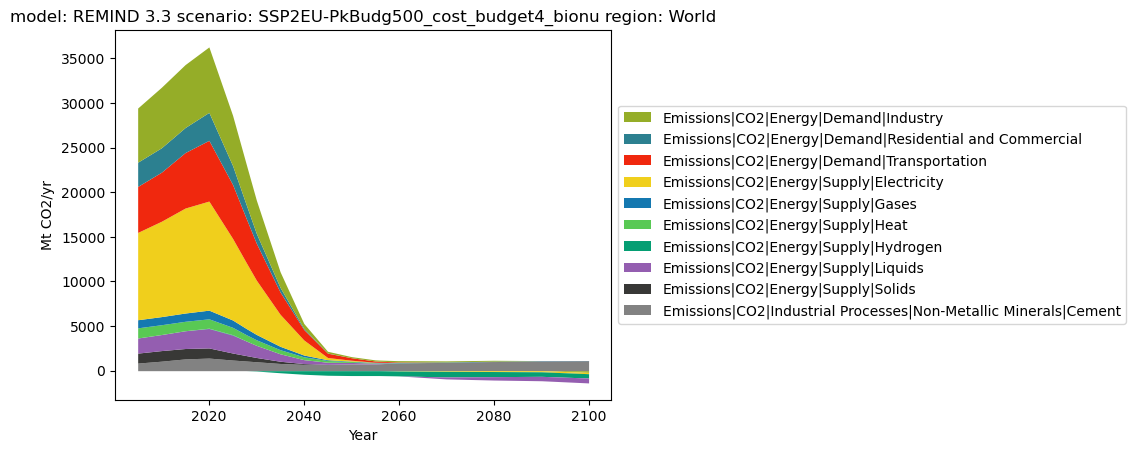

In [32]:
df.filter(variable = 'Emissions|CO2*', region = 'World', level = 3, scenario = '*budget*').filter(variable = ['*unkers*'], keep=False).plot.stack()

<Axes: title={'center': 'model: REMIND-MAgPIE 2.1-4.3 scenario: DeepElec_SSP2_ HighRE_Budg900 region: World'}, xlabel='Year', ylabel='Mt CO2/yr'>

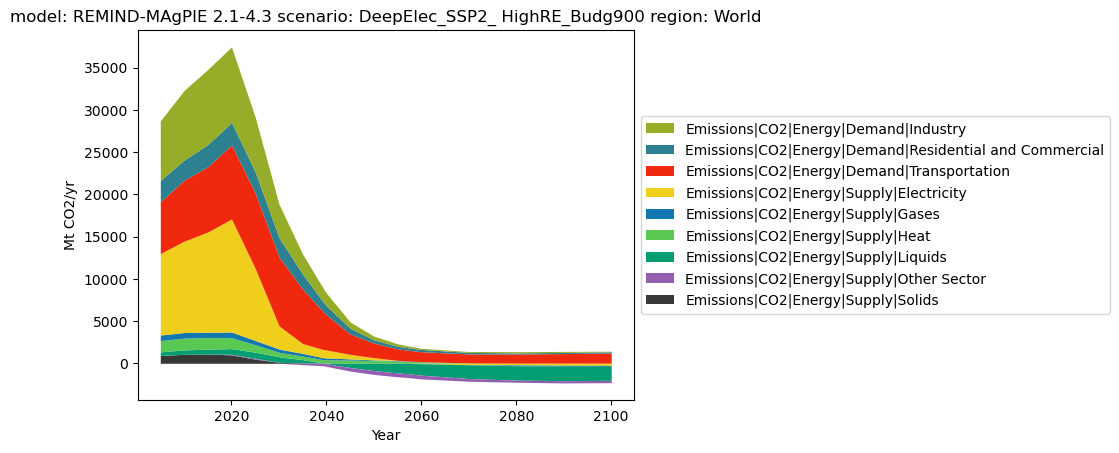

In [33]:
ipcc_ar6.filter(variable = 'Emissions|CO2*', region = 'World', level = 3, scenario = '*Deep*').plot.stack()

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_budget4_bionu region: World'}, xlabel='Year', ylabel='EJ/yr'>

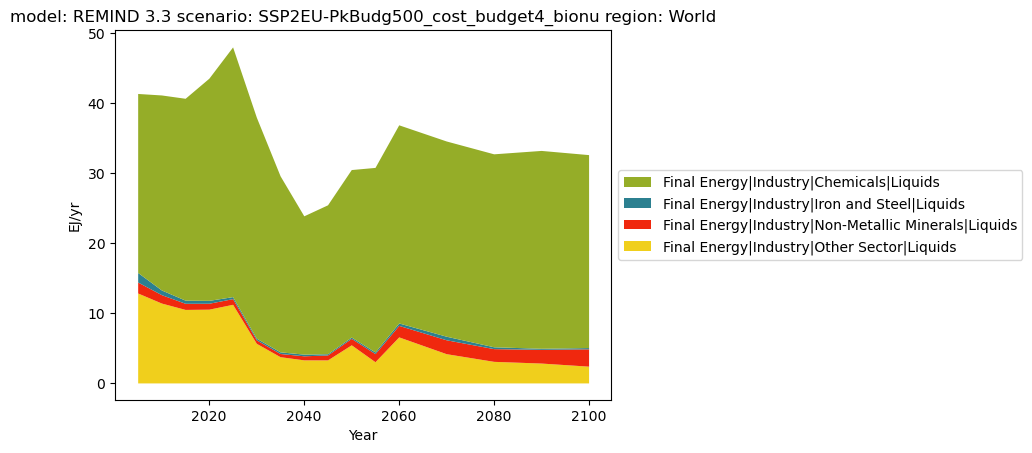

In [35]:
df.filter(region = 'World', variable = [
    'Final Energy|Industry|Chemicals|Liquids',
    'Final Energy|Industry|Iron and Steel|Liquids',
    'Final Energy|Industry|Non-Metallic Minerals|Liquids',
    'Final Energy|Industry|Other Sector|Liquids'], scenario = '*budge*').plot.stack()

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_year_bionu region: World'}, xlabel='Year', ylabel='EJ/yr'>

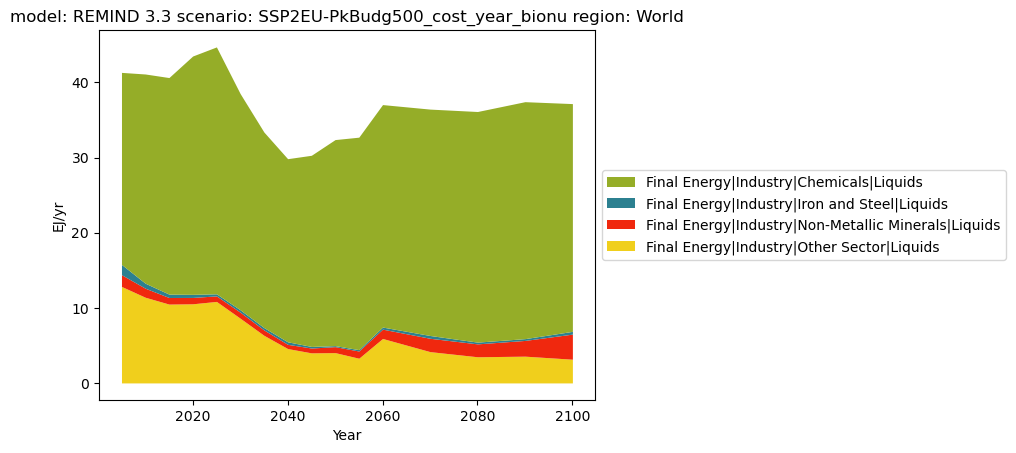

In [100]:
df.filter(region = 'World', variable = [
    'Final Energy|Industry|Chemicals|Liquids',
    'Final Energy|Industry|Iron and Steel|Liquids',
    'Final Energy|Industry|Non-Metallic Minerals|Liquids',
    'Final Energy|Industry|Other Sector|Liquids'], scenario = '*year*').plot.stack()

In [51]:
df.subtract('Primary Energy|Oil', 'Final Energy|Non-Energy Use|Solids', 'Primary Energy|Oil-FE|NE|Liquids',append=True)
df.subtract('Primary Energy|Oil', 'Final Energy|Non-Energy Use|Solids', 'Primary Energy|Oil-FE|NE|Solids',append=True)
df.subtract('Primary Energy|Gas', 'Final Energy|Non-Energy Use|Gases', 'Primary Energy|Oil-FE|NE|Gases',append=True)

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_budget4_bionu region: World'}, xlabel='Year', ylabel='EJ/yr'>

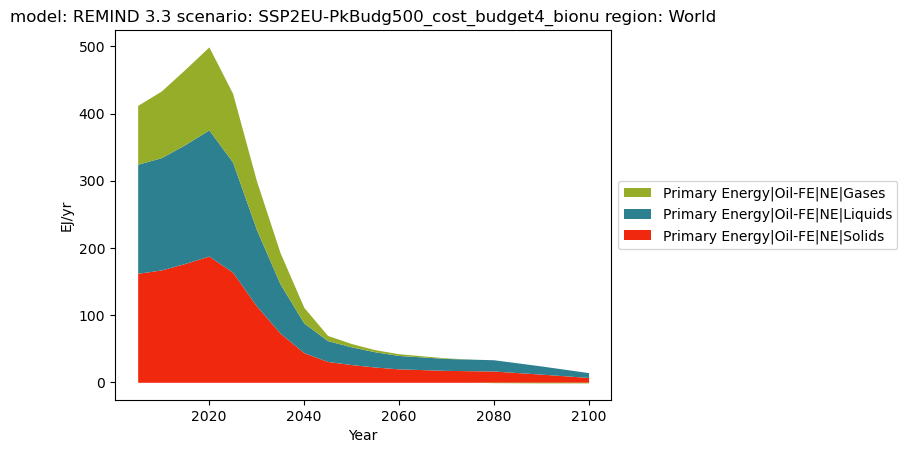

In [54]:
df.filter(variable = ['Primary Energy|Oil-FE|NE|Gases',
 'Primary Energy|Oil-FE|NE|Liquids',
 'Primary Energy|Oil-FE|NE|Solids'], region = 'World', scenario = '*budget*').plot.stack()

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_year_bionu region: World'}, xlabel='Year', ylabel='EJ/yr'>

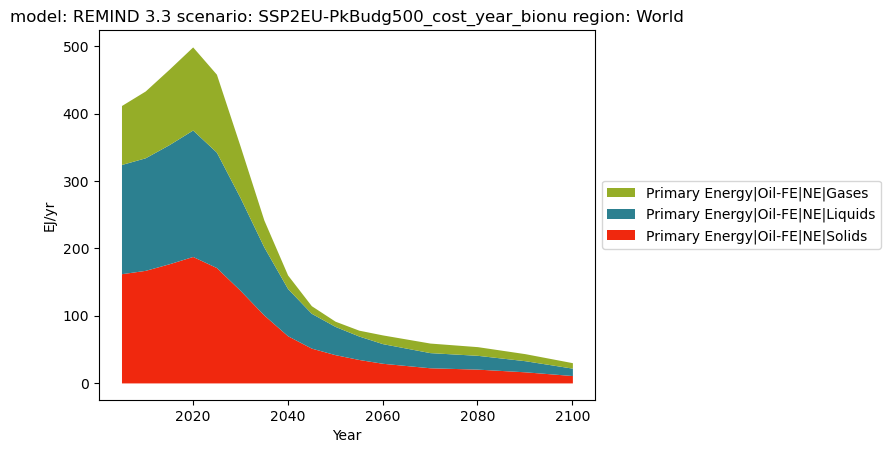

In [55]:
df.filter(variable = ['Primary Energy|Oil-FE|NE|Gases',
 'Primary Energy|Oil-FE|NE|Liquids',
 'Primary Energy|Oil-FE|NE|Solids'], region = 'World', scenario = '*year*').plot.stack()

In [24]:
df.divide(
    'Final Energy|Electricity', 
    'Final Energy', 
    'Share|Final Energy|Electricity',
    ignore_units=True
).filter(region = 'World').timeseries()

2005  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.159929   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.159929   

                                                                                                  2010  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.166158   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.166158   

                                                                                                  2015  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.180403   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.180403   

                                                                                                  2020  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.193944   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.193944   

                                                                                                  2025  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.236653   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.225048   

                                                                                                  2030  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.360383   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.318555   

                                                                                                  2035  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.498029   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.439323   

                                                                                                  2040  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.609612   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.558556   

                                                                                                  2045  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.660541   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.622435   

                                                                                                  2050  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|F

In [23]:
df.filter(variable = ['Final Energy|Electricity', 'Final Energy'], region = 'World').timeseries()

2005  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  343.531406   
                                                      Final Energy|Electricity EJ/yr   54.940669   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  343.531406   
                                                      Final Energy|Electricity EJ/yr   54.940669   

                                                                                            2010  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  370.857278   
                                                      Final Energy|Electricity EJ/yr   61.620746   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  370.857278   
                                                      Final Energy|Electricity EJ/yr   61.620746   

                                                                                            2015  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  401.360863   
                                                      Final Energy|Electricity EJ/yr   72.406523   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  401.360863   
                                                      Final Energy|Electricity EJ/yr   72.406523   

                                                                                            2020  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  435.195121   
                                                      Final Energy|Electricity EJ/yr   84.403294   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  435.195121   
                                                      Final Energy|Electricity EJ/yr   84.403294   

                                                                                            2025  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  400.216541   
                                                      Final Energy|Electricity EJ/yr   94.712258   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  415.788210   
                                                      Final Energy|Electricity EJ/yr   93.572155   

                                                                                            2030  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  366.268221   
                                                      Final Energy|Electricity EJ/yr  131.996832   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  354.323079   
                                                      Final Energy|Electricity EJ/yr  112.871212   

                                                                                            2035  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  349.055916   
                                                      Final Energy|Electricity EJ/yr  173.839956   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  

### CCS

Text(0.5, 1.0, 'Default scenario')

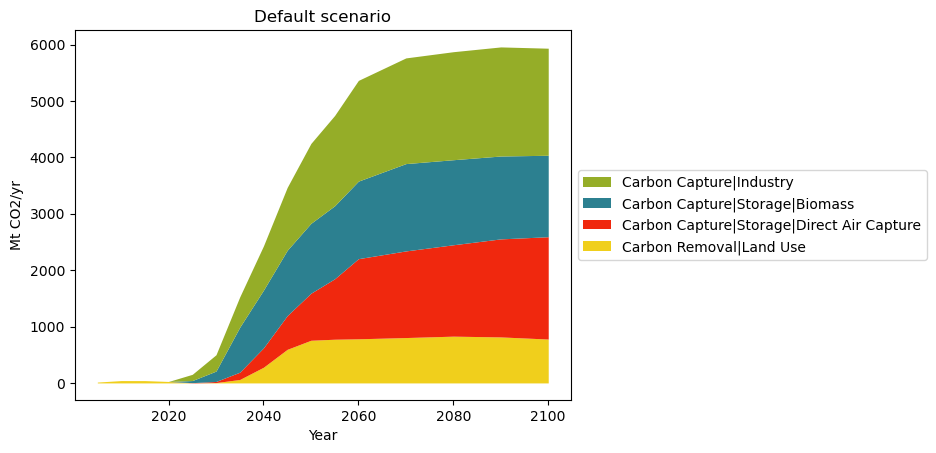

In [63]:
df.filter(variable = [
    'Carbon Capture|Storage|Biomass',
    'Carbon Capture|Storage|Direct Air Capture',
    'Carbon Removal|Land Use',
    'Carbon Capture|Industry'
], 
          region = 'World', scenario = '*year*').plot.stack()
plt.title('Default scenario')

In [61]:
df.filter(variable = [
    'Carbon Capture|Biomass',
    'Carbon Capture|Direct Air Capture',
    'Carbon Removal|Land Use',
    'Carbon Capture|Industry'
], 
          region = 'World',
          year = [2030,2050,2100]
         ).timeseries()

2030  \
model      scenario                            region variable                          unit                    
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Carbon Capture|Biomass            Mt CO2/yr  362.522071   
                                                      Carbon Capture|Direct Air Capture Mt CO2/yr  249.746032   
                                                      Carbon Capture|Industry           Mt CO2/yr  424.461721   
                                                      Carbon Removal|Land Use           Mt CO2/yr    6.196667   
           SSP2EU-PkBudg500_cost_year_bionu    World  Carbon Capture|Biomass            Mt CO2/yr  337.182426   
                                                      Carbon Capture|Direct Air Capture Mt CO2/yr   40.782628   
                                                      Carbon Capture|Industry           Mt CO2/yr  289.429229   
                                                      Carbon Removal|Land Use           Mt CO2/yr    6.196667   

                                                                                                          2050  \
model      scenario                            region variable                          unit                     
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Carbon Capture|Biomass            Mt CO2/yr  1492.005415   
                                                      Carbon Capture|Direct Air Capture Mt CO2/yr  2545.715783   
                                                      Carbon Capture|Industry           Mt CO2/yr  1492.454221   
                                                      Carbon Removal|Land Use           Mt CO2/yr   756.470000   
           SSP2EU-PkBudg500_cost_year_bionu    World  Carbon Capture|Biomass            Mt CO2/yr  1600.198368   
                                                      Carbon Capture|Direct Air Capture Mt CO2/yr  1050.669068   
                                                      Carbon Capture|Industry           Mt CO2/yr  1416.332783   
                                                      Carbon Removal|Land Use           Mt CO2/yr   756.470000   

                                                                                                          2100  
model      scenario                            region variable                          unit                    
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Carbon Capture|Biomass            Mt CO2/yr  2546.309606  
                                                      Carbon Capture|Direct Air Capture Mt CO2/yr  4608.451621  
                                                      Carbon Capture|Industry           Mt CO2/yr  1769.787407  
                                                      Carbon Removal|Land Use           Mt CO2/yr   777.883333  
           SSP2EU-PkBudg500_cost_year_bionu    World  Carbon Capture|Biomass            Mt CO2/yr  2742.013342  
                                                      Carbon Capture|Direct Air Capture Mt CO2/yr  4301.563707  
                                                      Carbon Capture|Industry           Mt CO2/yr  1898.043047  
                                                      Carbon Removal|Land Use           Mt CO2/yr   777.883333